In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!apt update && apt install -y openslide-tools
! pip install openslide-python

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [814 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [2,251 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:13 http://security.ubuntu.com

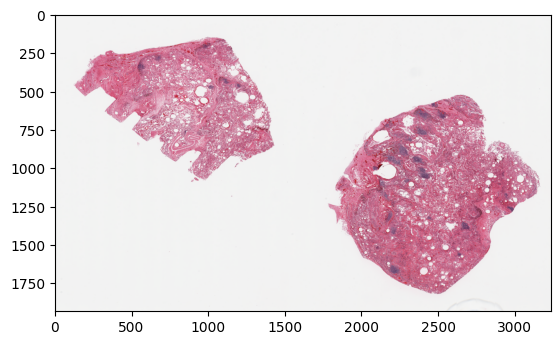

In [5]:
from openslide import open_slide
import matplotlib.pyplot as plt

slide = open_slide('/content/drive/MyDrive/Colab Notebooks/Lung/controls/control3_GTEX-13CF2-0726.svs')

level = 2

slide_image = slide.read_region((0,0), level, slide.level_dimensions[level])
plt.imshow(slide_image)
plt.show()

In [6]:
# get the level 0 information
slide_dims = slide.dimensions
print(slide_dims)

(51791, 30932)


In [7]:
slide_thumb_600 = slide.get_thumbnail(size=(600, 600))
slide_thumb_600.show()

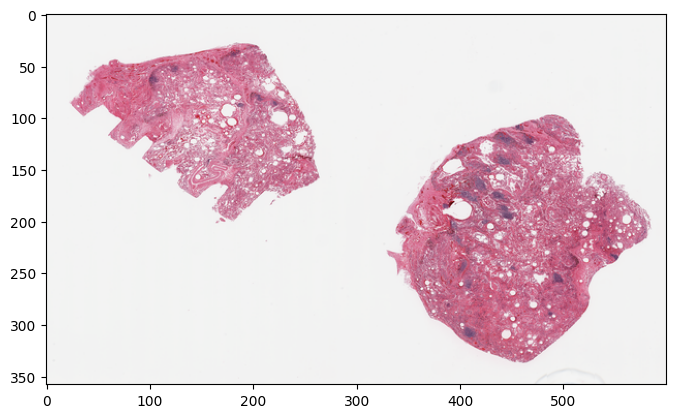

In [8]:
import numpy as np

slide_thumb_600_np = np.array(slide_thumb_600)
plt.figure(figsize=(8, 8))
plt.imshow(slide_thumb_600_np)

In [9]:
slide_thumb_600_np.shape

(358, 600, 3)

segment image by DeepZoomGenerator

In [10]:
from openslide.deepzoom import DeepZoomGenerator

tiles = DeepZoomGenerator(slide, tile_size=1024, overlap=0, limit_bounds=False)
tiles.level_count

17

In [11]:
from openslide.deepzoom import DeepZoomGenerator

# Assuming 'slide' is your OpenSlide object
tiles = DeepZoomGenerator(slide, tile_size=512, overlap=0, limit_bounds=False)

# Print the total number of levels
print("Total Levels:", tiles.level_count)

# Iterate through each level and print its dimensions
for level in range(tiles.level_count):
    dimensions = tiles.level_dimensions[level]
    print(f"Level {level}: Dimensions {dimensions}")


Total Levels: 17
Level 0: Dimensions (1, 1)
Level 1: Dimensions (2, 1)
Level 2: Dimensions (4, 2)
Level 3: Dimensions (7, 4)
Level 4: Dimensions (13, 8)
Level 5: Dimensions (26, 16)
Level 6: Dimensions (51, 31)
Level 7: Dimensions (102, 61)
Level 8: Dimensions (203, 121)
Level 9: Dimensions (405, 242)
Level 10: Dimensions (810, 484)
Level 11: Dimensions (1619, 967)
Level 12: Dimensions (3237, 1934)
Level 13: Dimensions (6474, 3867)
Level 14: Dimensions (12948, 7733)
Level 15: Dimensions (25896, 15466)
Level 16: Dimensions (51791, 30932)


In [12]:
tiles.level_dimensions[tiles.level_count-1]

(51791, 30932)

In [13]:
tile_count_in_large_image = tiles.level_tiles[tiles.level_count-1]
tile_count_in_large_image

(102, 61)

In [14]:
tile_dims = tiles.get_tile_dimensions(tiles.level_count-1, (44,25))
print(tile_dims)
#Last tiles may not have full 512x512 dimensions as our large image is not exactly divisible by 512
tile_dims = tiles.get_tile_dimensions(tiles.level_count-1, (20,20))
print(tile_dims)

(512, 512)
(512, 512)


In [20]:
cols, rows = tiles.level_tiles[tiles.level_count-1]

import numpy as np
import os

tile_dir = '/content/drive/MyDrive/Colab Notebooks/Lung/controls/control_3_13CF2-0726/'


for row in range(rows):
  for col in range(cols):
    tile_name = os.path.join(tile_dir, 'original', '%d_%d' % (row, col))
    # print("Now saving tile with title: ", tile_name)
    temp_tile = tiles.get_tile(tiles.level_count-1, (col, row))

     # Convert the PIL Image to RGB mode
    temp_tile_rgb = temp_tile.convert('RGB')
    temp_tile_np = np.array(temp_tile_rgb)


    plt.imsave(tile_name + ".png", temp_tile_np)

    if temp_tile_np.mean() < 220 and temp_tile_np.std() > 30:
      tile_name2 = os.path.join(tile_dir, 'segment', '%d_%d' % (row, col))
      # print("Processing tile number:", tile_name2)
      plt.imsave(tile_name2 + ".png", temp_tile_np)
    else:
      tile_name3 = os.path.join(tile_dir, 'blank', '%d_%d' % (row, col))
      # print("Processing tile number:", tile_name3)
      plt.imsave(tile_name3 + ".png", temp_tile_np)
  print('Finished %d / %d' % (row+1, rows+1))

Finished 1 / 62
Finished 2 / 62
Finished 3 / 62
Finished 4 / 62
Finished 5 / 62
Finished 6 / 62
Finished 7 / 62
Finished 8 / 62
Finished 9 / 62
Finished 10 / 62
Finished 11 / 62
Finished 12 / 62
Finished 13 / 62
Finished 14 / 62
Finished 15 / 62
Finished 16 / 62
Finished 17 / 62
Finished 18 / 62
Finished 19 / 62
Finished 20 / 62
Finished 21 / 62
Finished 22 / 62
Finished 23 / 62
Finished 24 / 62
Finished 25 / 62
Finished 26 / 62
Finished 27 / 62
Finished 28 / 62
Finished 29 / 62
Finished 30 / 62
Finished 31 / 62
Finished 32 / 62
Finished 33 / 62
Finished 34 / 62
Finished 35 / 62
Finished 36 / 62
Finished 37 / 62
Finished 38 / 62
Finished 39 / 62
Finished 40 / 62
Finished 41 / 62
Finished 42 / 62
Finished 43 / 62
Finished 44 / 62
Finished 45 / 62
Finished 46 / 62
Finished 47 / 62
Finished 48 / 62
Finished 49 / 62
Finished 50 / 62
Finished 51 / 62
Finished 52 / 62
Finished 53 / 62
Finished 54 / 62
Finished 55 / 62
Finished 56 / 62
Finished 57 / 62
Finished 58 / 62
Finished 59 / 62
Finish

In [ ]:
from PIL import Image


def find_mean_std_pixel_value(img_list):

    avg_pixel_value = []
    stddev_pixel_value= []
    for file in img_list:
        image = Image.open(file)
        image = np.array(image)
        avg = image.mean()
        std = image.std()
        avg_pixel_value.append(avg)
        stddev_pixel_value.append(std)

    avg_pixel_value = np.array(avg_pixel_value)
    stddev_pixel_value=np.array(stddev_pixel_value)

    print("Average pixel value for all images is:", avg_pixel_value.mean())
    print("Average std dev of pixel value for all images is:", stddev_pixel_value.mean())

    return(avg_pixel_value, stddev_pixel_value)



import glob
orig_tile_dir_name = "/content/drive/MyDrive/Colab Notebooks/Lung/cases/2case_1_12BJ1-1026/"

blank_img_list=(glob.glob(orig_tile_dir_name+"test_blank/*.png"))
partial_img_list=(glob.glob(orig_tile_dir_name+"test_partial/*.png"))
good_img_list=(glob.glob(orig_tile_dir_name+"test_useful/*.png"))

blank_img_stats = find_mean_std_pixel_value(blank_img_list)
partial_img_stats = find_mean_std_pixel_value(partial_img_list)
good_img_stats = find_mean_std_pixel_value(good_img_list)

Average pixel value for all images is: 246.38520315715246
Average std dev of pixel value for all images is: 5.240493627533305
Average pixel value for all images is: 242.09475871494837
Average std dev of pixel value for all images is: 20.4671570841745
Average pixel value for all images is: 195.8775955835978
Average std dev of pixel value for all images is: 64.82276248882712
